In [1]:
%matplotlib inline

In [2]:
import sympy
import math
import cmath
import numpy as np
import numpy.polynomial.polynomial as p
import matplotlib.pyplot as plt
from turtle import *
import re
from sympy.ntheory import discrete_log
from matplotlib.transforms import Affine2D
import skimage.io
import time
# imports for egienvalues and eigenvectors
from numpy import linalg as LA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

# Principal Component Analysis

## Topic:

Principal Component Analysis

Sometimes a projection of a higher-dimensional to a lower-dimensional space is useful. It's extremely useful if we want to get some visual understanding of a, say, 15D space, in 3D or even 2D. One algorithm which allows us to project multidimensional data into fewer dimensions while keeping the most important shapes and structures is called principal component analysis (PCA). You can explore this using the following checklist:

- [x] What are eigenvalues and eigenvectors?
- [x] What is the eigenbasis? 
- [x] What is the spectrum of a matrix?
- [x] How do we compute the eigenvalues and eigenvectors of a matrix?
- [x] What is projection?
- [x] How does projection conserve some shapes? Think about an object casting a shadow
- [x] How is the projection problem related to eigenvalues and eigenvectors?
- [x] What is PCA?
- [x] What are principal components? How many components are there (as a function of dimensions of the original space)?
- [x] What is variance? What is explained variance?
- [x] How do principal components relate to explained variance?
- [ ] How is PCA implemented? Implement and show.
- [ ] Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images.
- [ ] Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.


## But first...

_Let's cover a few terms and definitions, so we have them at hand for clarity sake._

_Please continue reading below and jump and check the [Definitions](#Definitions) section when needed for anything which is in the scope of this article._

## What are eigenvalues and eigenvectors?

In linear algebra, an eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. 

The corresponding eigenvalue, often denoted by λ is the factor by which the eigenvector is scaled.

Let’s consider for an example that we want to build mathematical models (equations) where the input data is gathered from a large number of sources.

It introduces its own sets of problems such as the large sparse matrix can end up taking a significant amount of space on a disk. Plus, it becomes extremely time-consuming for the model to train itself on the data. Furthermore, it is difficult to understand and visualize data with more than 3 dimensions, let alone a dataset of over 100+ dimensions. Hence, it would be ideal to somehow compress/transform this data into a smaller dataset.

There is a solution. We can utilise Eigenvalues and Eigenvectors to reduce the dimension space. To elaborate, one of the key methodologies to improve efficiency in computationally intensive tasks is to reduce the dimensions after ensuring most of the key information is maintained.

**Eigenvalues and Eigenvectors are the key tools to use in those scenarios.**

**1. What Is An Eigenvector?**

> Intuitively, an eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it. [[Reference]](#TheMathematicsBehindPrincipalComponentAnalysis)

For the sake of simplicity, let’s consider that we live in a two-dimensional world.

- Alex’s house is located at coordinates [10,10] (x=10 and y =10). Let’s refer to it as vector A.

- Furthermore, his friend Bob lives in a house with coordinates [20,20] (x=20 and y=20). I will refer to it as vector B.

If Alex wants to meet Bob at his place then Alex would have to travel +10 points on the x-axis and +10 points on the y-axis. This movement and direction can be represented as a two-dimensional vector [10,10]. Let’s refer to it as vector C.

We can see that vector A to B are related because vector B can be achieved by scaling (multiplying) the vector A by 2. This is because 2 x [10,10] = [20,20]. This is the address of Bob. Vector C also represents the movement for A to reach B.

**The key to note is that a vector can contain the magnitude and direction of a movement.**

We learned from the introduction above that large set of data can be represented as a matrix and we need to somehow compress the columns of the sparse matrix to speed up our calculations. Plus if we multiply a matrix by a vector then we achieve a new vector. The multiplication of a matrix by a vector is known as transformation matrices.

**We can transform and change matrices into new vectors by multiplying a matrix with a vector. The multiplication of the matrix by a vector computes a new vector. This is the transformed vector.**
    
- Sometimes, the new transformed vector is just a scaled form of the original vector. This means that the new vector can be re-calculated by simply multiplying a scalar (number) to the original vector; just as in the example of vector A and B above.
    
- And other times, the transformed vector has no direct scalar relationship with the original vector which we used to multiply to the matrix.

**If the new transformed vector is just a scaled form of the original vector then the original vector is known to be an eigenvector of the original matrix. Vectors that have this characteristic are special vectors and they are known as eigenvectors. Eigenvectors can be used to represent a large dimensional matrix.**

Therefore, if our input is a large sparse matrix M then we can find a vector o that can replace the matrix M. The criteria is that the product of matrix M and vector o should be the product of vector o and a scalar n:

$$M * o = n* o$$

This means that a matrix M and a vector o can be replaced by a scalar n and a vector o.
In this instance, o is the eigenvector and n is the eigenvalue and our target is to find o and n.

Therefore an eigenvector is a vector that does not change when a transformation is applied to it, except that it becomes a scaled version of the original vector.

Eigenvectors can help us calculating an approximation of a large matrix as a smaller vector. There are many other uses which I will explain later on in the article.

Eigenvectors are used to make linear transformation understandable. Think of eigenvectors as stretching/compressing an X-Y line chart without changing their direction.

**2. What is an Eigenvalue?**

*Eigenvalue— The scalar that is used to transform (stretch) an Eigenvector.*

**3. Where are Eigenvectors and Eigenvalues used?** 

There are multiple uses of eigenvalues and eigenvectors:

1. Eigenvalues and Eigenvectors have their importance in linear differential equations where you want to find a rate of change or when you want to maintain relationships between two variables.

*Think of eigenvalues and eigenvectors as providing summary of a large matrix*

2. We can represent a large set of information in a matrix. Performing computations on a large matrix is a very slow process. To elaborate, one of the key methodologies to improve efficiency in computationally intensive tasks is to reduce the dimensions after ensuring most of the key information is maintained. Hence, one eigenvalue and eigenvector are used to capture key information that is stored in a large matrix. This technique can also be used to improve the performance of data churning components.

3. Component analysis is one of the key strategies that is utilised to reduce dimension space without losing valuable information. The core of component analysis (PCA) is built on the concept of eigenvalues and eigenvectors. The concept revolves around computing eigenvectors and eigenvalues of the covariance matrix of the features.

4. Additionally, eigenvectors and eigenvalues are used in facial recognition techniques such as EigenFaces.

5. They are used to reduce dimension space. The technique of Eigenvectors and Eigenvalues are used to compress the data. As mentioned above, many algorithms such as PCA rely on eigenvalues and eigenvectors to reduce the dimensions.

*Eigenvectors and eigenvalues are used to reduce noise in data. They can help us improve efficiency in computationally intensive tasks. They also eliminate features that have a strong correlation between them.*

6. Occasionally we gather data that contains a large amount of noise. Finding important or meaningful patterns within the data can be extremely difficult. Eigenvectors and eigenvalues can be used to construct spectral clustering. They are also used in singular value decomposition.

7. We can also use eigenvector to rank items in a dataset. They are heavily used in search engines and calculus.

8. Lastly, in non-linear motion dynamics, eigenvalues and eigenvectors can be used to help us understand the data better as they can be used to transform and represent data into manageable sets.

*It can be slow to compute eigenvectors and eigenvalues. The computation is $O(n^3)$*

**4. What are the building blocks of Eigenvalues and Eigenvectors?**

Let’s understand the foundations of Eigenvalues and Eigenvectors.

Eigenvectors and eigenvalues revolve around the concept of matrices.

Matrices are used in machine learning problems to represent a large set of information. Eigenvalues and eigenvectors are all about constructing one vector with one value to represent a large matrix. Sounds very useful, right?

**What is a matrix?** 

- A matrix has a size of X rows and Y columns, like a table.

- A square matrix is the one that has a size of n, implying that X and Y are equal.

- A square matrix is represented as A. This is an example of a square matrix:

$$
\begin{bmatrix}
A & B & C \\
D & E & F \\
G & H & I
\end{bmatrix}
$$

*Note: Matrix properties are out of the scope of this article.*

## How do we compute the eigenvalues and eigenvectors of a matrix?

Calculating Eigenvectors and Eigenvalues

*Although we don’t have to calculate the Eigenvalues and Eigenvectors by hand every time but it is important to understand the inner workings to be able to confidently use the algorithms.*

- The eigenvector is an array with n entries where n is the number of rows (or columns) of a square matrix. The eigenvector is represented as x.

- Key Note: The direction of an eigenvector does not change when a linear transformation is applied to it.

- Therefore, Eigenvector should be a non-null vector

- We are required to find a number of values, known as eigenvalues such that

$$ A * x = \lambda * x$$

The above equation states that we need to find eigenvalue (lambda) and eigenvector (x) such that when we multiply a scalar lambda (eigenvalue) to the vector x (eigenvector) then it should equal to the linear transformation of the matrix A once it is scaled by vector x (eigenvector).

**Eigenvalues are represented as lambda.**

**Note: The above equation should not be invertible.**

There are two special keywords which we need to understand: Determinant of a matrix and an identity matrix.

The **determinant of a matrix** is a number that is computed from a square matrix. In a nutshell, the diagonal elements are multiplied by each other and then they are subtracted together. We need to ensure that the determinant of the matrix is 0.

We need an **Identity Matrix**. An identity square matrix is a matrix that has 1 in diagonal and all of its elements are 0. The identity matrix is represented as I:

$$\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$$

We can represent

$$A * x = \lambda * x$$

As:

$$A * x - \lambda * x = 0$$

Now, we need to compute a characteristic equation.

$$|A - \lambda * I| = 0$$


Subsequently:

$$Determinant(A - \lambda * I) = 0$$

### How do I calculate Eigenvalue?

The task is to find Eigenvalues of size n for a matrix A of size n.

Therefore, the aim is to find Eigenvector and Eigenvalues of A such that:

$$ A * Eigenvector — Eigenvalue * EigenVector = 0 $$

**Find Lambda Such that:**

$$ Determinant(A — \lambda * I) = 0$$

Based on the concepts from above:

$\lambda * I$ is:

$$
\begin{bmatrix}
\lambda & 0 & 0 \\
0 & \lambda & 0 \\
0 & 0 & \lambda
\end{bmatrix}
$$

if A is:

$$
\begin{bmatrix}
A & B & C \\
D & E & F \\
G & H & I
\end{bmatrix}
$$

Then $A - \lambda * I$ is:

$$
\begin{bmatrix}
A & B & C \\
D & E & F \\
G & H & I
\end{bmatrix}
-
\begin{bmatrix}
\lambda & 0 & 0 \\
0 & \lambda & 0 \\
0 & 0 & \lambda
\end{bmatrix}
=
\begin{bmatrix}
A-\lambda & B & C \\
D & E-\lambda & F \\
G & H & I-\lambda
\end{bmatrix}
$$

Finally calculate the determinant of $(A-\lambda*I)$ as:

$$
A-\lambda
\begin{bmatrix}
E-\lambda & F \\
H & I-\lambda
\end{bmatrix}
-B
\begin{bmatrix}
D & F \\
G & I-\lambda
\end{bmatrix}
+C
\begin{bmatrix}
D & E-\lambda \\
G & H
\end{bmatrix}
=0
$$

Once the equation above is solved, we will get the values of lambda $\lambda$. 
*These values are the Eigenvalues.*

Once we have calculated eigenvalues, we can calculate the Eigenvectors of matrix A by using Gaussian Elimination.

Gaussian elimination is about converting the matrix to row echelon form. Finally, it is about solving the linear system by back substitution.

An explanation of Gaussian elimination is out of the scope of this article so that we can concentrate on Eigenvalues and Eigenvectors.

**Once we have the Eigenvalues, we can find Eigenvector for each of the Eigenvalues. We can substitute the eigenvalue in the lambda and we will achieve an eigenvector.**

$$(A - \lambda * I) * x = 0$$

*Therefore if a square matrix has a size n then we will get n eigenvalues and as a result, n eigenvectors will be computed to represent the matrix.*

### A practical example: Calculating Eigenvalue and Eigenvector

**Let’s find eigenvalue of the following matrix A:**

$$\begin{bmatrix}
2 & -1 \\
4 & 3
\end{bmatrix}$$

First, multiply lambda to an identity matrix and then subtract the two matrices:

$$
\begin{bmatrix}
\begin{bmatrix}
2 & -1 \\
4 & 3
\end{bmatrix}
-\lambda
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\end{bmatrix}
$$

We need to compute a determinant of:

$$
\begin{bmatrix}
2-\lambda & -1 \\
4 & 3-\lambda
\end{bmatrix}
$$

Therefore:

$$
det
\begin{bmatrix}
2-\lambda & -1 \\
4 & 3-\lambda
\end{bmatrix}
=
\lambda^2 - 5\lambda + 10
$$

Once we solve the quadratic equation above, we will yield two Eigenvalues:

$$
\frac{5}{2} + i\frac{\sqrt{15}}{2},
\frac{5}{2} - i\frac{\sqrt{15}}{2}
$$

**Now that we have computed Eigenvalues, let’s calculate Eigenvectors:**

Take the first Eigenvalue (Lambda $\lambda$) and substitute the eigenvalue into the following equation:

$$(A - \lambda * I)$$

We plug in the first Eigenvalue (Lambda $\lambda$) to get the matrix:

$$
\begin{bmatrix}
2 & -1 \\
4 & 3
\end{bmatrix}
-
\left(\frac{5}{2} + i\frac{\sqrt{15}}{2}\right)
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
=
\begin{bmatrix}
-\frac{1}{2}-i\frac{\sqrt{15}}{2} & -1 \\
4 & \frac{1}{2}-i\frac{\sqrt{15}}{2}
\end{bmatrix}
$$

This gives us the following Eigenvector, which is for the first eigenvalue:

$$
\begin{bmatrix}
-1 + \sqrt{15}i \\
8
\end{bmatrix}
$$

This Eigenvector now represents the key information of matrix A.

If we do the same for the other Eigenvalue we will get:

$$
\begin{bmatrix}
-1 - \sqrt{15}i \\
8
\end{bmatrix}
$$

### Calculating Eigenvalues and Eigenvectors in Python

Although we don’t have to calculate the Eigenvalues and Eigenvectors by hand but it is important to understand the inner workings to be able to confidently use the algorithms. Furthermore, It is very straightforward to calculate eigenvalues and eigenvectors in Python.

We can use `numpy.linalg.eig` module. It takes in a square matrix as the input and returns eigenvalues and eigenvectors. It also raises an `LinAlgError` if the eigenvalue computation does not converge.

In [3]:
import numpy as np
from numpy import linalg as LA

input = np.array([[2,-1],[4,3]])
w, v = LA.eig(input)

print("Eigenvalues:")
print(w)
print("\n")
print("Eigenvectors:")
print(v)

Eigenvalues:
[2.5+1.93649167j 2.5-1.93649167j]


Eigenvectors:
[[-0.1118034 +0.4330127j -0.1118034 -0.4330127j]
 [ 0.89442719+0.j         0.89442719-0.j       ]]


## What is the eigenbasis? 

Eigenbasis is a basis for a vector space consisting entirely of eigenvectors.

### Eigenbasis and Diagonalization

Given that we know that a transformation can have up to $n$ Eigenvectors, where $n$ is the number of rows, what happens if we use the Eigenvectors as a **change of basis**, by multiplying the transformation by the matrix of the Eigenvectors?

As it turns out, converting the transformation to an Eigenbasis, if possible, (a conversion otherwise known as **Eigendecomposition**) is an incredibly useful conversion because of what happens to the transformation when it is converted in such a way.

Take for example, the matrix 
$
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
$.

This matrix scales by a factor of 2 along the y-axis, shears along the xz-axis by a factor of 1.

This transformation has Eigenvalues $\lambda = 2$ and $\lambda = 1$ with algebraic multiplicity 2.

It also has Eigenvectors 
$\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}$
, for 
$\lambda = 2$, and $\begin{bmatrix}
0 \\
-1 \\
1
\end{bmatrix}$
and
$\begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}$
, for $\lambda = 1$.

These Eigenvectors can be arranged into a new matrix called an **Eigenbasis**:

$$
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
$$

And the inverse of the Eigenbasis can be found too:

$$
\begin{bmatrix}
0& 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 1
\end{bmatrix}
$$

Let's consider what happens if we change the basis of our matrix by premultiplying by the inverse of the Eigenbasis, then postmultiplying by the Eigenbasis (a transformation also known as an **Eigendecomposition**):

$$
\begin{bmatrix}
0& 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
=
\begin{bmatrix}
1& 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2
\end{bmatrix}
$$

Here it is important to note the following -  the result of changing the basis to a matrix to its Eigenbasis is that the matrix is put into a **Diagonalized form**. This is extremely useful, because while the matrix is in a diagonalized form, we can represent it like this:

$$
\begin{pmatrix}
1 \\
1 \\
2
\end{pmatrix}
\cdot I
$$

Thus, if we want to apply any matrix multiplication operation to the matrix in its diagonalized form, it is the same as applying a matrix-vector optimization. Computer Scientists will recognize this as a huge performance win, since an 
$O(N^2)$ operation just became $O(N)$. Say for example we wanted to calcalculate the 16th power of the matrix:

$$
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
$$

Conventionally, this would take $9^2 \times 16 = 1296$ operations. If we did the same thing on the diagonal, we can exploit the fact that we are exponentiating by powers of two and same thing would take just three barrel-shift operations, preceded by and followed by a normal matrix multiplication to undo the diagonalization.

Given a set of eigenvectors and eigenvalues for a matrix, we can re-construct the original matrix. Why is this the case? Notice that when we decomposed the matrix, we did the following:

$$
AP = PD \\
P^{-1}AP = D
$$

Where $P$ was our matrix of eigenvectors, $A$ was our original matrix that underwent eigendecomposition and $D$ is the eigendecomposed matrix.

A property of eigenvalues is that multiplying the original matrix $A$ by an eigenvector $V$ is the same as multiplying that eigenvector by its eigenvalue $\lambda$. All the multiplication does in both cases is scale the vector.

This is the same thing if you multiply by a matrix that only has elements on the diagonal - the effect is scaling, regardless of whether the multiplication was a premultiplication or a postmultiplication. So it stands to reason that if you were to arrange the eigenvalues into a diagonal matrix $E$ with their columns corresponding to each eigenvector in the matrix $P$, then the following, just like above with $AP = PD$, holds true:

$$AP = PE$$

Lets see if this checks out:

$$
AP = 
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
=
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 2 \\
1 & 0 & 0
\end{bmatrix}
$$

$$
PE = 
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
1& 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2
\end{bmatrix}
=
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 2 \\
1 & 0 & 0
\end{bmatrix}
$$

Same thing! So now we can do the same thing as before - postmultiply both sides by $P^{-1}$ and it should be the case that we recover $A$, eg:

$$
APP^{-1} = PEP^{-1} \\
A = PEP^{-1}
$$

$$
A = 
\begin{bmatrix}
0& 1 & 0 \\
-1 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
1& 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2
\end{bmatrix}
\begin{bmatrix}
0& 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 1
\end{bmatrix}
=
\begin{bmatrix}
1& 0 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1
\end{bmatrix}
$$

## What is the spectrum of a matrix?


_Now that we have covered some ground, before we proceed, let's step back and cover some Fundamental theory of matrix eigenvectors and eigenvalues._

### Fundamental theory of matrix eigenvectors and eigenvalues 
[[1]](#1)

A (non-zero) vector $v$ of dimension $N$ is an eigenvector of a square $N \times N$ matrix $A$ if it satisfies the linear equation:

$$\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$$

where $\lambda$ is a scalar, termed the **eigenvalue** corresponding to $v$. That is, the eigenvectors are the vectors that the linear transformation $A$ merely elongates or shrinks, and the amount that they elongate/shrink by is the **eigenvalue**. The above equation is called the **eigenvalue equation** or the **eigenvalue problem**.

This yields an equation for the eigenvalues:

$$ p\left(\lambda \right)=\det \left(\mathbf{A} -\lambda \mathbf{I} \right)=0$$

We call $p(\lambda)$ the **characteristic polynomial**, and the equation, called the **characteristic equation**, is an $Nth$ order polynomial equation in the unknown $\lambda$. This equation will have $N\lambda$ distinct solutions, where $1 \leq N\lambda \leq N$. The set of solutions, that is, the eigenvalues, is called the **spectrum** of $A$.

We can factor $p$ as:

$$p\left(\lambda \right)=\left(\lambda -\lambda_{1}\right)^{n_{1}}\left(\lambda -\lambda _{2}\right)^{n_{2}}\cdots \left(\lambda -\lambda _{N_{\lambda }}\right)^{n_{N_{\lambda }}}=0$$

The integer $n_i$ is termed the algebraic multiplicity of eigenvalue $\lambda_i$. If the field of scalars is algebraically closed, the algebraic multiplicities sum to $N$:

$${\sum \limits _{i=1}^{N_{\lambda }}{n_{i}}=N}$$

For each eigenvalue $\lambda_i$, we have a specific eigenvalue equation:

$${\displaystyle \left(\mathbf {A} -\lambda _{i}\mathbf {I} \right)\mathbf {v} =0}$$

There will be $1 \leq m_i \leq n_i$ linearly independent solutions to each eigenvalue equation. The linear combinations of the $m_i$ solutions are the eigenvectors associated with the eigenvalue $\lambda_i$. The integer mi is termed the geometric multiplicity of $$\lambda_i$$. It is important to keep in mind that the algebraic multiplicity $n_i$ and geometric multiplicity $m_i$ may or may not be equal, but we always have $m_i \leq n_i$. The simplest case is of course when $m_i = n_i = 1$. The total number of linearly independent eigenvectors, $N_v$, can be calculated by summing the geometric multiplicities:

$${\displaystyle \sum \limits _{i=1}^{N_{\lambda }}{m_{i}}=N_{\mathbf {v} }}$$

The eigenvectors can be indexed by eigenvalues, using a double index, with $v_{ij}$ being the $jth$ eigenvector for the $ith$ eigenvalue. The eigenvectors can also be indexed using the simpler notation of a single index $v_k$, with $k = 1, 2, ..., N_v$.

_Note: algebraic multiplicity and geometric multiplicity are out of the scope of this article._

### Spectrum of a matrix 
[[Spectrum of a matrix]](#Spectrumofamatrix)

In mathematics, the spectrum of a matrix is the set of its eigenvalues. More generally, if ${\displaystyle T\colon V\to V}$ is a linear operator over any finite-dimensional vector space, its spectrum is the set of scalars ${\displaystyle \lambda }$  such that ${\displaystyle T-\lambda I}$ I is not **invertible**. The determinant of the matrix equals the product of its eigenvalues. Similarly, the **trace** of the matrix equals the sum of its eigenvalues. From this point of view, we can define the **pseudo-determinant** for a **singular matrix** to be the product of its nonzero eigenvalues.


## What is projection?

### Projection (linear algebra)
[[Projection (linear algebra)]](#Projectionlinearalgebra)

In linear algebra and functional analysis, a **projection** is a linear transformation ${\displaystyle P}$ from a vector space to itself such that ${\displaystyle P^{2}=P}$. That is, whenever ${\displaystyle P}$ is applied twice to any value, it gives the same result as if it were applied once (idempotent). It leaves its image unchanged. Though abstract, this definition of "projection" formalizes and generalizes the idea of graphical projection. One can also consider the effect of a projection on a geometrical object by examining the effect of the projection on points in the object.

<img src="./resources/252px-Orthogonal_projection.svg.png" width="252" height="252"/>

<div style="text-align: center">The transformation $P$ is the orthogonal projection onto the line $m$.</div>

#### Projection (linear algebra) definitions

A projection on a vector space ${\displaystyle V}$ is a linear operator ${\displaystyle P:V\to V}$ such that ${\displaystyle P^{2}=P}$.

When ${\displaystyle V}$ has an inner product and is complete (i.e. when ${\displaystyle V}$ is a Hilbert space) the concept of orthogonality can be used. A projection ${\displaystyle P}$ on a Hilbert space ${\displaystyle V}$ is called an **orthogonal projection** if it satisfies ${\displaystyle \langle P\mathbf {x} ,\mathbf {y} \rangle =\langle \mathbf {x} ,P\mathbf {y} \rangle }$ for all ${\displaystyle \mathbf {x} ,\mathbf {y} \in V}$. A projection on a Hilbert space that is not orthogonal is called an **oblique projection**.

_**Projection matrix**_

- In the finite-dimensional case, a square matrix ${\displaystyle P}$ is called a **projection matrix** if it is equal to its square, i.e., if ${\displaystyle P^{2}=P}$.

- A square matrix ${\displaystyle P}$ is called an **orthogonal projection matrix** if ${\displaystyle P^{2}=P=P^{\mathrm {T}}}$ for a real matrix, and respectively ${\displaystyle P^{2}=P=P^{*}}$ for a complex matrix, where ${\displaystyle P^{\mathrm {T}}}$ denotes the transpose of ${\displaystyle P}$ and ${\displaystyle P^{*}}$ denotes the adjoint of ${\displaystyle P}$.

- A projection matrix that is not an orthogonal projection matrix is called an **oblique projection matrix**.

The eigenvalues of a projection matrix must be 0 or 1.

#### Projection (linear algebra) definitions

___Orthogonal projection___

For example, the function which maps the point ${\displaystyle (x,y,z)}$ in three-dimensional space ${\displaystyle \mathbb{R} ^{3}}$ to the point ${\displaystyle (x,y,0)}$ is an orthogonal projection onto the $xy$-plane. This function is represented by the matrix:

${\displaystyle P={\begin{bmatrix}1&0&0\\0&1&0\\0&0&0\end{bmatrix}}.}$

The action of this matrix on an arbitrary vector is:

${\displaystyle P{\begin{bmatrix}x\\y\\z\end{bmatrix}}={\begin{bmatrix}x\\y\\0\end{bmatrix}}}$

To see that ${\displaystyle P}$ is indeed a projection, i.e., ${\displaystyle P=P^{2}}$, we compute:

$${\displaystyle P^{2}{\begin{bmatrix}x\\y\\z\end{bmatrix}}=P{\begin{bmatrix}x\\y\\0\end{bmatrix}}={\begin{bmatrix}x\\y\\0\end{bmatrix}}=P{\begin{bmatrix}x\\y\\z\end{bmatrix}}}$$

Observing that ${\displaystyle P^{\mathrm {T} }=P}$ shows that the projection is an orthogonal projection.

___Oblique projection___

A simple example of a non-orthogonal (oblique) projection (for definition see below) is:

${\displaystyle P={\begin{bmatrix}0&0\\\alpha &1\end{bmatrix}}}$

Via matrix multiplication, one sees that:

$${\displaystyle P^{2}={\begin{bmatrix}0&0\\\alpha &1\end{bmatrix}}{\begin{bmatrix}0&0\\\alpha &1\end{bmatrix}}={\begin{bmatrix}0&0\\\alpha &1\end{bmatrix}}=P}$$

proving that ${\displaystyle P}$ is indeed a projection.

The projection ${\displaystyle P}$ is orthogonal if and only if ${\displaystyle \alpha =0}$ because only then ${\displaystyle P^{\mathrm {T} }=P}$.


### Vector projection

[[Vector projection]](#Vectorprojection)

The vector projection of a vector $a$ on (or onto) a nonzero vector $b$, sometimes denoted ${\displaystyle \operatorname {proj} _{\mathbf {b} }\mathbf {a} }$ (also known as the **vector component** or **vector resolution** of $a$ in the direction of $b$), is the orthogonal projection of $a$ onto a straight line parallel to $b$. It is a vector parallel to $b$, defined as:

$${\displaystyle \mathbf {a} _{1}=a_{1}\mathbf {\hat {b}}}$$

where ${\displaystyle a_{1}}$ is a scalar, called the scalar projection of $a$ onto $b$, and ${\hat{b}}$ is the unit vector in the direction of $b$.

In turn, the scalar projection is defined as:

$${\displaystyle a_{1}=\left\|\mathbf {a} \right\|\cos \theta =\mathbf {a} \cdot \mathbf {\hat {b}} =\mathbf {a} \cdot {\frac {\mathbf {b} }{\left\|\mathbf {b} \right\|}}}$$

where the operator $⋅$ denotes a dot product, $‖a‖$ is the length of $a$, and $θ$ is the angle between $a$ and $b$.

<img src="./resources/200px-Projection_and_rejection.png" width="200" />

<div style="text-align: center">Projection of $a$ on $b$ ($a_1$), and rejection of $a$ from $b$ ($a_2$).</div>

The scalar projection is equal to the length of the vector projection, with a minus sign if the direction of the projection is opposite to the direction of $b$. The vector component or vector resolute of $a$ perpendicular to $b$, sometimes also called the **vector rejection** of $a$ from $b$ (denoted ${\displaystyle \operatorname {oproj} _{\mathbf {b} }\mathbf {a}}$ is the orthogonal projection of $a$ onto the plane orthogonal to $b$. Both the projection $a_1$ and rejection $a_2$ of a vector $a$ are vectors, and their sum is equal to $a$, which implies that the rejection is given by: ${\displaystyle \mathbf {a} _{2}=\mathbf {a} -\mathbf {a} _{1}.}$

<img src="./resources/248px-Projection_and_rejection_2.png" width="248"/>

<div style="text-align: center">When $90° < θ ≤ 180°$, $a_1$ has an opposite direction with respect to $b$.</div>

#### Notation

Typically, a vector projection is denoted in a bold font (e.g. $\pmb{a_{1}}$), and the corresponding scalar projection with normal font (e.g. $a_1$). In some cases, especially in handwriting, the vector projection is also denoted using a diacritic above or below the letter (e.g., ${\displaystyle {\vec {a}}_{1}}$ or $\underline{a}_1$). The vector projection of $a$ on $b$ and the corresponding rejection are sometimes denoted by $a_{∥b}$ and $a_{⊥b}$, respectively.

## How does projection conserve some shapes? Think about an object casting a shadow.


### Projection (mathematics)
[[Projection (mathematics)]](#Projectionmathematics)

In mathematics, a **projection** is a mapping of a set (or other mathematical structure) into a subset (or sub-structure), which is equal to its square for mapping composition (or, in other words, which is idempotent). The restriction to a subspace of a projection is also called a projection, even if the idempotence property is lost. An everyday example of a projection is the casting of shadows onto a plane (paper sheet). The projection of a point is its shadow on the paper sheet. The shadow of a point on the paper sheet is this point itself (idempotency). The shadow of a three-dimensional sphere is a closed disk. Originally, the notion of projection was introduced in Euclidean geometry to denote the projection of the Euclidean space of three dimensions onto a plane in it, like the shadow example. The two main projections of this kind are:

- The projection from a point onto a plane or central projection: If $C$ is a point, called the center of projection, then the projection of a point $P$ different from $C$ onto a plane that does not contain $C$ is the intersection of the line $CP$ with the plane. The points $P$ such that the line $CP$ is parallel to the plane does not have any image by the projection, but one often says that they project to a point at infinity of the plane (see projective geometry for a formalization of this terminology). The projection of the point $C$ itself is not defined.

- The projection parallel to a direction $D$, onto a plane or parallel projection: The image of a point $P$ is the intersection with the plane of the line parallel to $D$ passing through $P$.


### 3D projection 

[[3Dprojection]](#3Dprojection)

A **3D projection** (or **graphical projection**) is a design technique used to display a **three-dimensional (3D)** object on a **two-dimensional (2D)** surface. These projections rely on visual perspective and aspect analysis to project a complex object for viewing capability on a simpler plane.

3D projections use the primary qualities of an object's basic shape to create a map of points, that are then connected to one another to create a visual element. The result is a graphic that contains conceptual properties to interpret that the figure or image is not actually flat (2D), but rather, is a solid object (3D) being viewed on a 2D display.

3D objects are largely displayed on two-dimensional mediums (i.e. paper and computer monitors). As such, graphical projections are a commonly used design element; notably, in engineering drawing, drafting, and computer graphics.



### Parallel projection 
[[Parallel projection]](#Parallelprojection)

A **parallel projection** is a projection of an object in three-dimensional space onto a fixed plane, known as the projection plane or image plane, where the rays, known as lines of sight or projection lines, are parallel to each other. It is a basic tool in descriptive geometry. The projection is called orthographic if the rays are perpendicular (orthogonal) to the image plane, and oblique or skew if they are not.


<img src="./resources/Cube-parallel-proj-s.svg.png" width="300"/>

<div style="text-align: center">Two parallel projections of a cube. In an orthographic projection (at left), the projection lines are perpendicular to the image plane (pink). In an oblique projection (at right), the projection lines are at a skew angle to the image plane.</div>

## How is the projection problem related to eigenvalues and eigenvectors?

From the [Projection (linear-algebra)](#Projection-(linear-algebra)) and more specifically from the **Projection matrix** section we know that the eigenvalues of a projection matrix must be **0** or **1**.

The included images illustrate the orthogonal projection(the general case), the orthogonal projection of a vector $𝑣∈𝐸$ ($𝑣$ is an eigenvector corresponding to the eigenvalue $1$), respectively the orthogonal projection of a vector in $𝐸⊥$ ($𝑣$ is an eigenvector corresponding to $0$).
[[Reference]](#eigenandprojection2)


<img src="./resources/orthogonal-projection-1/VVgp3.png" width="196"/>
<img src="./resources/orthogonal-projection-1/maKtj.png" width="196"/>
<img src="./resources/orthogonal-projection-1/TObdO.png" width="196"/>

However, not all eigenvectors are in the projection plane of a (projection) matrix, unless it is the identity matrix.
If $P$ is a projection matrix, then it has two eigenvalues:  $0$  and  $1$  (we will assume  $𝑃≠0$  and  $𝑃≠𝐼$  for simplicity). Every nonzero vector in the column space of $P$ (that is, in the projection plane) is an eigenvector corresponding to the eigenvalue $1$. Every nonzero vector orthogonal to the column space of $P$ will be an eigenvector corresponding to the eigenvalue $0$.[[Reference]](#eigenandprojection)



## What is PCA?

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

The central idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of a large number of interrelated variables while retaining as much as possible of the variation present in the data set. This is achieved by transforming to a new set of variables, the principal components (PCs), which are uncorrelated, and which are ordered so that the first few retain most of the variation present in all of the original variables.

For example lets say that we have 15 dimensions but we can only view a 3 dimensional (3D) space. PCA solves this for us by reducing the dimensions from 15 to 3. Another example is reducing a 3D image to its first 2 principal components and plotting the 3D as a 2D image.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible. [[Reference]](#ASTEP-BY-STEPEXPLANATIONOFPRINCIPALCOMPONENTANALYSIS)


### PCA Motivation

Let’s say that you want to predict what the gross domestic product (GDP) of the United States will be for 2017. You have lots of information available: the U.S. GDP for the first quarter of 2017, the U.S. GDP for the entirety of 2016, 2015, and so on. You have any publicly-available economic indicator, like the unemployment rate, inflation rate, and so on. You have U.S. Census data from 2010 estimating how many Americans work in each industry and American Community Survey data updating those estimates in between each census. You know how many members of the House and Senate belong to each political party. You could gather stock price data, the number of IPOs occurring in a year, and how many CEOs seem to be mounting a bid for public office. Despite being an overwhelming number of variables to consider, this just scratches the surface.

Basically you have a lot of variables to consider.

If you’ve worked with a lot of variables before, you know this can present problems. Do you understand the relationships between each variable?

You might ask the question, "How do I take all of the variables I’ve collected and focus on only a few of them?" In technical terms, you want to "reduce the dimension of your feature space."

Somewhat unsurprisingly, reducing the dimension of the feature space is called "**dimensionality reduction**". There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:

- Feature Elimination
- Feature Extraction

**Feature elimination** is what it sounds like: we reduce the feature space by eliminating features. In the GDP example above, instead of considering every single variable, we might drop all variables except the three we think will best predict what the U.S.’s gross domestic product will look like. Advantages of feature elimination methods include simplicity and maintaining interpretability of your variables.

As a disadvantage, though, you gain no information from those variables you’ve dropped. If we only use last year’s GDP, the proportion of the population in manufacturing jobs per the most recent American Community Survey numbers, and unemployment rate to predict this year’s GDP, we’re missing out on whatever the dropped variables could contribute to our model. By eliminating features, we’ve also entirely eliminated any benefits those dropped variables would bring.

**Feature extraction**, however, doesn’t run into this problem. Say we have ten independent variables. In feature extraction, we create ten "new" independent variables, where each "new" independent variable is a combination of each of the ten "old" independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

You might say, "Where does the dimensionality reduction come into play?" Well, we keep as many of the new independent variables as we want, but we drop the "least important ones." Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. But because these new independent variables are combinations of our old ones, we’re still keeping the most valuable parts of our old variables, even when we drop one or more of these "new" variables!

**Principal component analysis** is a technique for **feature extraction** — so it combines our input variables in a specific way, then we can drop the "least important" variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the "new" variables after PCA are all independent of one another.

[[Reference]](#StopShopforPrincipalComponentAnalysis)

## What are principal components? How many components are there (as a function of dimensions of the original space)?

### What are principal components?

**Principal components** are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on. [[Reference]](#ASTEP-BY-STEPEXPLANATIONOFPRINCIPALCOMPONENTANALYSIS)

There are as many principal components as there are variables. [[Reference]](#Makingsenseofprincipalcomponentanalysiseigenvectorseigenvalues)

<img src="./resources/Principal Component Analysis Principal Components.png" width="700"/>

<div style="text-align: center">Percentage of Variance (Information) for each by PC</div>

For this new property, with maximum possible information, called "**first principal component**" and for the other **principal compontents**, it is accepted that instead of saying _"property"/"properties"_ or _"characteristic"/"characteristics"_ we usually say _"feature"/"features"_ or _"variable"/"variables"_. [[Reference]](#Makingsenseofprincipalcomponentanalysiseigenvectorseigenvalues)

**Principal components** (PC) basically refer to the new variables constructed as a linear combination of initial features, such that these new variables are uncorrelated. Since the principal components are independent of one another, they are perpendicular to each other in the cartesian space. [[Reference]](#UnderstandingtheMathematicsbehindPrincipalComponentAnalysis)


The **Principal Components** of a dataset are the **eigenvectors** of that dataset.
The **eigenvectors** (**principal components**) determine the directions of the new feature space, and the **eigenvalues** determine their magnitude. [[Reference]](#PrincipalComponentAnalysisin3SimpleSteps)

To get the principal components in the order of their significance, we need to rank them in the order of their **eigenvalues**. [[Reference]](#UnderstandingtheMathematicsbehindPrincipalComponentAnalysis)

Every **principal component** will always be **orthogonal** (the official math term for **perpendicular**) to every other **principal component**. [[Reference]](#AOne-StopShopforPrincipalComponentAnalysis)


## What is variance? What is explained variance?

To understand **variance** and **explained variance**, first let's get the basic idea of the following:

- _Spread of a data set_

In statistics, spread describes the variability of a data set, that is, how the data is spread out and varies from the mean.
Measures of spread include the range; quartiles, deciles, percentiles; the five number summary; standard deviation and **variance**. 

[[Reference]](#AmathsdictionaryforkidsSpread)

- _Standard deviation_

In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values.
A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

Standard deviation may be abbreviated **SD**, and is most commonly represented in mathematical texts and equations by the lower case Greek letter sigma $σ$, for the population standard deviation, or the Latin letter $s$, for the sample standard deviation.

[[Reference]](#Standarddeviation)

- _Variance_

In probability theory and statistics, variance is the expectation of the squared deviation of a random variable from its mean. In other words, it measures how far a set of numbers is spread out from their average value.

[[Reference]](#Variance)

- _Explained Variance_

In statistics, explained variation measures the proportion to which a mathematical model accounts for the variation of a given data set. Often, variation is quantified as **variance**; then, the more specific term **explained variance** can be used.

[[Reference]](#Explainedvariation)

#### <u>Variance</u>

In the context of PCA **variance** means explanatory power.
PCA helps for high dimensional data by letting you see in which directions your data has the most **variance**. These directions are the **principal components**. [[Reference]](#Makingsenseofprincipalcomponentanalysiseigenvectorseigenvalues)

**Eigenvalues** are the magnitude (the **variance**) in the principal components.
The sum of all eigenvalues is equal to the sum of variances which are on the diagonal of the variance-covariance matrix.
[[Reference]](#Makingsenseofprincipalcomponentanalysiseigenvectorseigenvalues)



#### <u>Explained Variance</u>

**Explained variance** can be calculated from the eigenvalues. The explained variance tells us how much information (**variance**) can be attributed to each of the principal components. [[Reference]](#PrincipalComponentAnalysisin3SimpleSteps)

The **total variance** is the sum of variances of all individual principal components.

The fraction of **variance explained** by a principal component is the ratio between the **variance of that principal component** and the **total variance**.

For several principal components, add up their **variances** and divide by the **total variance**.

[[Reference]](#ExplainedvarianceinPCA)


## How do principal components relate to explained variance?

**Explained variance** can be calculated from the eigenvalues. The explained variance tells us how much information (**variance**) can be attributed to each of the principal components. [[Reference]](#PrincipalComponentAnalysisin3SimpleSteps)

## How is PCA implemented? Implement and show.


### How does PCA work?

This section provides a brief summary before jumping into the algorithm.

- We are going to calculate a matrix that summarizes how our variables all relate to one another.

- We’ll then break this matrix down into two separate components: direction and magnitude. We can then understand the "directions" of our data and its "magnitude" (or how "important" each direction is). The screenshot below, from the [setosa.io applet](https://setosa.io/ev/principal-component-analysis/), displays the two main directions in this data: the “red direction” and the “green direction.” In this case, the “red direction” is the more important one.

<img src="./resources/setosa-io-1.png" width="416"/>

<div style="text-align: center">Our original data in the xy-plane.</div>

- We will transform our original data to align with these important directions (which are combinations of our original variables). The screenshot below (again from [setosa.io](https://setosa.io/ev/principal-component-analysis/) is the same exact data as above, but transformed so that the x- and y-axes are now the "red direction" and "green direction."

<img src="./resources/setosa-io-2.png" width="416"/>

<div style="text-align: center">Our original data transformed by PCA.</div>

- While the visual example here is two-dimensional (and thus we have two "directions"), think about a case where our data has more dimensions. By identifying which "directions" are most "important", we can compress or project our data into a smaller space by dropping the "directions" that are the "least important". By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space…

Here, we will walk through an algorithm for conducting PCA. It is not goint to be too technical, as it should just build a basic intuition of how the algorithm works and an example implementation is presnted in the next section.

Before starting, you should have tabular data organized with n rows and likely p+1 columns, where one column corresponds to your dependent variable (usually denoted $\mathbf{Y}$) and p columns where each corresponds to an independent variable (the matrix of which is usually denoted $\mathbf{X}$).

1. If a Y variable exists and is part of your data, then separate your data into $\mathbf{Y}$ and $\mathbf{X}$, as defined above — we’ll mostly be working with $\mathbf{X}$. (Note: if there exists no column for $\mathbf{Y}$, that’s okay — skip to the next point!)


2. Take the matrix of independent variables $\mathbf{X}$ and, for each column, subtract the mean of that column from each entry. (This ensures that each column has a mean of zero.)


3. Decide whether or not to standardize. Given the columns of $\mathbf{X}$, are features with higher variance more important than features with lower variance, or is the importance of features independent of the variance? (In this case, importance means how well that feature predicts $\mathbf{Y}$.) If the importance of features is independent of the variance of the features, then divide each observation in a column by that column's standard deviation. (This, combined with **step 2**, standardizes each column of $\mathbf{X}$ to make sure each column has mean zero and standard deviation 1.) Call the centered (and possibly standardized) matrix $\mathbf{Z}$.


- The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.


- More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.


- Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.

<img src="./resources/Principal Component Analysis Standardization.png" width="263"/>

<div style="text-align: center">Principal Component Analysis Standardization</div>


- Once the standardization is done, all the variables will be transformed to the same scale.[[Reference]](#ASTEP-BY-STEPEXPLANATIONOFPRINCIPALCOMPONENTANALYSIS)


4. Take the matrix $\mathbf{Z}$, transpose it, and multiply the transposed matrix by $\mathbf{Z}$. (Writing this out mathematically, we would write this as $\mathbf{ZᵀZ}$.) The resulting matrix is the covariance matrix of $\mathbf{Z}$, up to a constant.

- Covariance Matrix (or variance covariance matrix) is a square matrix of shape = number of features whose diagonal elements are the variance of each feature and off diagonal elements are covariance between features. [[Reference]](#TheMathematicsBehindPrincipalComponentAnalysisPCA)

<img src="./resources/cov-matrix-1.png" width="509"/>

<div style="text-align: center">Covariance matrix.</div>

- The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.


- The covariance matrix is a $p × p$ symmetric matrix (where $p$ is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables $x$, $y$, and $z$, the covariance matrix is a $3×3$ matrix of this from:

<img src="./resources/Principal Component Analysis Covariance Matrix.png" width="406"/>

<div style="text-align: center">Covariance Matrix for 3-Dimensional Data</div>

- Since the covariance of a variable with itself is its variance $(Cov(a,a)=Var(a))$, in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. And since the covariance is commutative $(Cov(a,b)=Cov(b,a))$, the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal.


- What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?


- It’s actually the sign of the covariance that matters:
    - If positive then: the two variables increase or decrease together (correlated).
    - If negative then: one increases when the other decreases (inversely correlated).


- Now, that we know that the covariance matrix is not more than a table that summaries the correlations between all the possible pairs of variables, let’s move to the next step.[[Reference]](#ASTEP-BY-STEPEXPLANATIONOFPRINCIPALCOMPONENTANALYSIS)


5. Calculate the eigenvectors and their corresponding eigenvalues of $\mathbf{ZᵀZ}$. This is quite easily done in most computing packages — in fact, the eigendecomposition of $\mathbf{ZᵀZ}$ is where we decompose $\mathbf{ZᵀZ}$ into $\mathbf{PDP⁻¹}$, where $\mathbf{P}$ is the matrix of eigenvectors and $\mathbf{D}$ is the diagonal matrix with eigenvalues on the diagonal and values of zero everywhere else. The eigenvalues on the diagonal of $\mathbf{D}$ will be associated with the corresponding column in $\mathbf{P}$ — that is, the first element of $\mathbf{D}$ is $λ₁$ and the corresponding eigenvector is the first column of $\mathbf{P}$. This holds for all elements in $\mathbf{D}$ and their corresponding eigenvectors in $\mathbf{P}$. We will always be able to calculate $\mathbf{PDP⁻¹}$ in this fashion.


6. Take the eigenvalues $λ₁, λ₂, …, λp$ and sort them from largest to smallest. In doing so, sort the eigenvectors in $\mathbf{P}$ accordingly. (For example, if $λ₂$ is the largest eigenvalue, then take the second column of $\mathbf{P}$ and place it in the first column position.) Depending on the computing package, this may be done automatically. Call this sorted matrix of eigenvectors $\mathbf{P*}$. (The columns of $\mathbf{P*}$ should be the same as the columns of $\mathbf{P}$, but perhaps in a different order.) Note that these eigenvectors are independent of one another.


7. Calculate $\mathbf{Z* = ZP*}$. This new matrix, $\mathbf{Z*}$, is a centered/standardized version of $\mathbf{X}$ but now each observation is a combination of the original variables, where the weights are determined by the eigenvector. As a bonus, because our eigenvectors in $\mathbf{P*}$ are independent of one another, each column of $\mathbf{Z*}$ is also independent of one another!

<img src="./resources/setosa-io-3.png" width="720"/>

<div style="text-align: center">An example from setosa.io where we transform five data points using PCA. The left graph is our original data $\mathbf{X}$; the right graph would be our transformed data $\mathbf{Z*}$.</div>

Note two things in this graphic:

- The two charts show the exact same data, but the right graph reflects the original data transformed so that our axes are now the principal components.


- In both graphs, the principal components are perpendicular to one another. In fact, every principal component will always be orthogonal (official math term for perpendicular) to every other principal component.

Because our principal components are orthogonal to one another, they are statistically linearly independent of one another... which is why our columns of $\mathbf{Z*}$ are linearly independent of one another!


8. Finally, we need to determine how many features to keep versus how many to drop. There are three common methods to determine this, discussed below:

- **Method 1:** We arbitrarily select how many dimensions we want to keep. Perhaps I want to visually represent things in two dimensions, so I may only keep two features. This is use-case dependent and there isn’t a hard-and-fast rule for how many features I should pick.


- **Method 2:** Calculate the proportion of variance explained (out of the scope of this article) for each feature, pick a threshold, and add features until you hit that threshold. (For example, if you want to explain 80% of the total variability possibly explained by your model, add features with the largest explained proportion of variance until your proportion of variance explained hits or exceeds 80%.)


- **Method 3:** This is closely related to **Method 2**. Calculate the proportion of variance explained for each feature, sort features by proportion of variance explained and plot the cumulative proportion of variance explained as you keep more features. (This plot is called a scree plot.) One can pick how many features to include by identifying the point where adding a new feature has a significant drop in variance explained relative to the previous feature, and choosing features up until that point.

[[Reference]](#AOne-StopShopforPrincipalComponentAnalysis)

#### How PCA constructs the Principal Components

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the **largest possible variance** in the data set. For example, let’s assume that the scatter plot of our data set is as shown below, can we guess the first principal component? Yes, it’s approximately the line that matches the purple marks because it goes through the origin and it’s the line in which the projection of the points (red dots) is the most spread out. Or mathematically speaking, it’s the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).

<img src="./resources/PCA-first-second-principal-gif-1.gif" width="1000"/>

<div style="text-align: center">An example gif animation showing how the average of the squared distances from the projected points (red dots) changes.</div>


The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

This continues until a total of $p$ principal components have been calculated, equal to the original number of variables.

[[Reference]](#ASTEP-BY-STEPEXPLANATIONOFPRINCIPALCOMPONENTANALYSIS)

### Principal Component Analysis (PCA) implementation

[[Reference]](#PrincipalComponentAnalysisin3SimpleSteps)

### PCA and Dimensionality Reduction

Often, the desired goal is to reduce the dimensions of a d-dimensional dataset by projecting it onto a ($k$)-dimensional subspace (where $k<d$) in order to increase the computational efficiency while retaining most of the information. An important question is "what is the size of $k$ that represents the data 'well'?"

Later, we will compute **eigenvectors** (**the principal components**) of a dataset and collect them in a projection matrix. Each of those **eigenvectors** is associated with an **eigenvalue** which can be interpreted as the "length" or "magnitude" of the corresponding **eigenvector**. If some **eigenvalues** have a significantly larger magnitude than others, then the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the "less informative" eigenpairs is reasonable.

### A Summary of the PCA Approach

- Standardize the data.
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix.
- Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k≤d$).
- Construct the projection matrix $\mathbf{W}$ from the selected $k$ eigenvectors.
- Transform the original dataset $\mathbf{X}$ via $\mathbf{W}$ to obtain a $k$-dimensional feature subspace $\mathbf{Y}$.

### Preparing the Iris Dataset

#### About Iris
For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:

1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

And the four features of in Iris dataset are:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="./resources/iris.png" alt="Iris" style="width:720px;"/>

### Loading the Dataset

In order to load the Iris data, we are going to use the pandas library.

- We can either read it directly from the UCI repository, like so:


In [4]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


- Or download the `iris.data` file and read it locally, like so:

In [5]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='./resources/data/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

### Comment out the print statements below if you want to see the actual values:
## X - the data, separate flower samples
# print(X)
## y - the classes
# print(y)

Our iris dataset is now stored in form of a  $150 \times 4$ matrix where the columns are the different features, and every row represents a separate flower sample.
Each sample row $\mathbf{x}$ can be pictured as a 4-dimensional vector   


$\mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} 
= \begin{pmatrix} \text{sepal length} \\ \text{sepal width} \\\text{petal length} \\ \text{petal width} \end{pmatrix}$

### Exploratory Visualization

To get a feeling for how the 3 different flower classes are distributes along the 4 different features, let us visualize them via histograms.


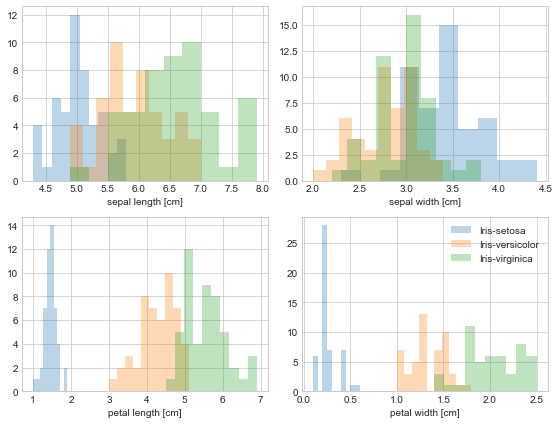

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=10)

    plt.tight_layout()
    plt.show()

### Standardizing

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1).

In [8]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

### Comment out the print statements below if you want to see the actual values:
# print(X_std)

### 1 - Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Covariance Matrix

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $\Sigma$, which is a $d \times d$ matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$$

We can summarize the calculation of the covariance matrix via the following matrix equation:

$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$

where $\mathbf{\bar{x}}$ is the mean vector 
$\mathbf{\bar{x}} = \sum\limits_{i=1}^n x_{i}.$

The mean vector is a $d$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [9]:
import numpy as np

mean_vec = np.mean(X_std, axis=0)

cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


The more verbose way above was simply used for demonstration purposes, equivalently, we could have used the numpy `cov` function:

In [10]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Next, we perform an eigendecomposition on the covariance matrix:

In [11]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


#### Correlation Matrix

Especially, in the field of "Finance", the correlation matrix is typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix.

Eigendecomposition of the standardized data based on the correlation matrix:

In [12]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


Eigendecomposition of the raw data based on the correlation matrix:

In [13]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:
    
- Eigendecomposition of the covariance matrix after standardizing the data.
- Eigendecomposition of the correlation matrix.
- Eigendecomposition of the correlation matrix after standardizing the data.

### 2 - Selecting Principal Components

#### Sorting Eigenpairs

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:

In [14]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: 

- The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.  

In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top $k$ eigenvectors.

In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.910818083752054
0.9212209307072242
0.14735327830509573
0.020607707235625678


#### Explained Variance

After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

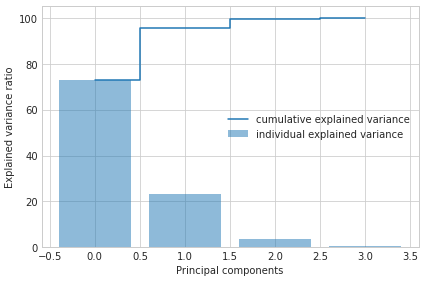

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    ### The line below saves the graphic as an image or PDF or etc..
    # plt.savefig('./resources/pca-explained-variance-1.png')

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

#### Projection Matrix

It's about time to get to the really interesting part: The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top *k* eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our $d \times k$-dimensional eigenvector matrix $\mathbf{W}$.

In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


### 3 - Projection Onto the New Feature Space

In this last step we will use the $4 \times 2$-dimensional projection matrix $\mathbf{W}$ to transform our samples onto the new subspace via the equation  
$\mathbf{Y} = \mathbf{X} \times  \mathbf{W}$, where $\mathbf{Y}$ is a $150\times 2$ matrix of our transformed samples.

In [19]:
Y = X_std.dot(matrix_w)

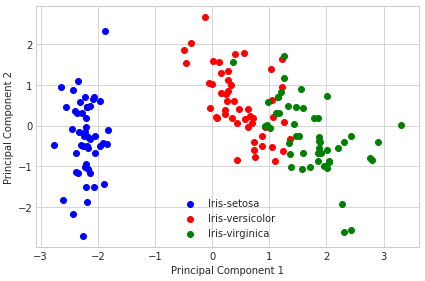

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()

    ### The line below saves the graphic as an image or PDF or etc..
    # plt.savefig('./resources/pca-new-feature-space-1.png')

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are "most spread" along the new feature axes.

### Shortcut - PCA in scikit-learn

For the purposes of this article, we went a long way to apply the PCA to the Iris dataset. But luckily, there is already implementation in scikit-learn.

In [21]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)

Y_sklearn = sklearn_pca.fit_transform(X_std)

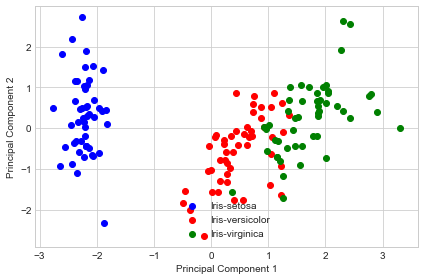

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images.

## Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.


## Definitions and additional materials
<a id="Definitions"></a>

### Euclidean vector
[[Euclidean vector]](#Euclideanvector)

In mathematics, physics and engineering, a Euclidean vector or simply a vector (sometimes called a geometric vector or spatial vector) is a geometric object that has magnitude (or length) and direction. Vectors can be added to other vectors according to vector algebra. A Euclidean vector is frequently represented by a ray (a line segment with a definite direction), or graphically as an arrow connecting an initial point $A$ with a terminal point $B$, and denoted by $\overrightarrow{AB}$.

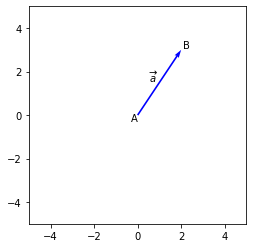

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
ax.annotate('A', xy=(-0.3, -0.3))
ax.annotate('B', xy=(2.1, 3.1))
ax.text(0.5, 1.5, '$\overrightarrow{a}$')

plt.quiver(0, 0, 2, 3, scale_units = "xy", angles = "xy", scale = 1, color ='b')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
# DO NOT USE plt.axis("equal") - will not work, or worse will not ALWAYS work, use plt.gca().set_aspect("equal")
plt.gca().set_aspect("equal")
plt.show()

### Determinant of a square matrix
[[Determinant]](#Determinant)

In mathematics, the determinant is a scalar value that is a function of the entries of a square matrix. It allows characterizing some properties of the matrix and the linear map represented by the matrix. In particular, the determinant is nonzero if and only if the matrix is **invertible**, and the linear map represented by the matrix is an isomorphism. The determinant of a product of matrices is the product of their determinants (the preceding property is a corollary of this one). The determinant of a matrix A is denoted $det(A)$, $det A$, or $|A|$.

In the case of a $2 \times 2$ matrix the determinant can be defined as:

$${\displaystyle {\begin{aligned}|A|={\begin{vmatrix}a&b\\c&d\end{vmatrix}}=ad-bc.\end{aligned}}}$$

Similarly, for a 3 × 3 matrix A, its determinant is

$${\displaystyle {\begin{aligned}|A|={\begin{vmatrix}a&b&c\\d&e&f\\g&h&i\end{vmatrix}}&=a\,{\begin{vmatrix}e&f\\h&i\end{vmatrix}}-b\,{\begin{vmatrix}d&f\\g&i\end{vmatrix}}+c\,{\begin{vmatrix}d&e\\g&h\end{vmatrix}}\\[3pt]&=aei+bfg+cdh-ceg-bdi-afh.\end{aligned}}}$$

Each determinant of a 2 × 2 matrix in this equation is called a minor of the matrix A. 

#### Determinant of a square matrix definition

There are various equivalent ways to define the determinant of a square matrix $A$, i.e. one with the same number of rows and columns. Perhaps the simplest way to express the determinant is by considering the elements in the top row and the respective **minors**; starting at the left, multiply the element by the minor, then subtract the product of the next element and its minor, and alternate adding and subtracting such products until all elements in the top row have been exhausted. For example, here is the result for a $4 × 4$ matrix:

$${\displaystyle {\begin{vmatrix}a&b&c&d\\e&f&g&h\\i&j&k&l\\m&n&o&p\end{vmatrix}}=a\,{\begin{vmatrix}f&g&h\\j&k&l\\n&o&p\end{vmatrix}}-b\,{\begin{vmatrix}e&g&h\\i&k&l\\m&o&p\end{vmatrix}}+c\,{\begin{vmatrix}e&f&h\\i&j&l\\m&n&p\end{vmatrix}}-d\,{\begin{vmatrix}e&f&g\\i&j&k\\m&n&o\end{vmatrix}}}$$


### Minor
[[Minor]](#Minorlinearalgebra)

In linear algebra, a minor of a matrix $A$ is the determinant of some smaller square matrix, cut down from A by removing one or more of its rows and columns.


### Linear isomorphism a.k.a. Linear map a.k.a. Linear transformation
[[Linear map]](#Linearmap)

In mathematics, a linear map (also called a **linear mapping, linear transformation, vector space homomorphism**, or in some contexts **linear function**) is a mapping ${\displaystyle V\rightarrow W}$ between two vector spaces that preserves the operations of vector addition and scalar multiplication.
If a linear map is a bijection then it is called a **linear isomorphism**.

### Bijection
[[Bijection]](#Bijectionwikipedia)

In mathematics, a bijection, bijective function, one-to-one correspondence, or invertible function, is a function between the elements of two sets, where each element of one set is paired with exactly one element of the other set, and each element of the other set is paired with exactly one element of the first set. There are no unpaired elements. 


### Linear independence
[[Linear independence]](#Linearindependence)

In the theory of vector spaces, a set of vectors is said to be linearly dependent if at least one of the vectors in the set can be defined as a **linear combination** of the others; if no vector in the set can be written in this way, then the vectors are said to be **linearly independent**. 

### Linear combination
[[Linear combination]](#Linearcombination)
    
In mathematics, a linear combination is an expression constructed from a set of terms by multiplying each term by a constant and adding the results (e.g. a linear combination of x and y would be any expression of the form $ax + by$, where a and b are constants).

Let $V$ be a vector space over the field $K$. As usual, we call elements of $V$ **vectors** and call elements of $K$ **scalars**. If $v_1,...,v_n$ are vectors and $a_1,...,a_n$ are scalars, then the linear combination of those vectors with those scalars as coefficients is:

$${\displaystyle a_{1}\mathbf {v} _{1}+a_{2}\mathbf {v} _{2}+a_{3}\mathbf {v} _{3}+\cdots +a_{n}\mathbf {v} _{n}}$$


### Pseudo-determinant
[[Pseudo-determinant]](#Pseudodeterminant)

In linear algebra and statistics, the **pseudo-determinant** is the product of all non-zero eigenvalues of a square matrix. It coincides with the regular determinant when the matrix is **non-singular**.


### Invertible matrix
[[Invertible matrix]](#Invertiblematrix)

In linear algebra, an $n-by-n$ square matrix $A$ is called invertible (also **nonsingular** or **nondegenerate**), if there exists an $n-by-n$ square matrix B such that:

$${\displaystyle \mathbf {AB} =\mathbf {BA} =\mathbf {I} _{n}\ }$$

where $I_n$ denotes the $n-by-n$ identity matrix and the multiplication used is ordinary matrix multiplication. If this is the case, then the matrix $B$ is uniquely determined by $A$, and is called the (multiplicative) **inverse** of $A$, denoted by $A^{−1}$. Matrix inversion is the process of finding the matrix $B$ that satisfies the prior equation for a given **invertible** matrix $A$.

A square matrix that is **not invertible** is called **singular** or **degenerate**. A square matrix is **singular** _if and only if_ its determinant is zero.

### Characteristic polynomial
[[Characteristic polynomial]](#Characteristicpolynomial)

In linear algebra, the **characteristic polynomial** of a square matrix is a polynomial which is invariant under matrix similarity and **has the eigenvalues as roots**. It has the **determinant** and the **trace** of the matrix among its coefficients.

#### Characteristic polynomial motivation
Given a square matrix $A$, we want to find a polynomial whose zeros are the eigenvalues of $A$. For a **diagonal matrix** $A$, the characteristic polynomial is easy to define: if the diagonal entries are $a_1, a_2, a_3, etc.$ then the characteristic polynomial will be:

$${\displaystyle (t-a_{1})(t-a_{2})(t-a_{3})\cdots}$$

This works because the diagonal entries are also the eigenvalues of this matrix.

For a general matrix A, one can proceed as follows. A scalar $\lambda$ is an eigenvalue of $A$ if and only if there is a nonzero vector $v$, called an eigenvector, such that:

$${\displaystyle A\mathbf {v} =\lambda \mathbf {v}}$$

or, equivalently,

$${\displaystyle (\lambda I-A)\mathbf {v} =0}$$

(where $I$ is the identity matrix). Since $v$ must be nonzero, this means that the matrix $λI – A$ has a nonzero **kernel**. Thus this matrix is not **invertible**, and the same is true for its **determinant**, which must therefore be zero. Thus the eigenvalues of $A$ are the roots of $det(λI – A)$, which is a polynomial in $λ$.

#### Characteristic polynomial formal definition

We consider an $n×n$ matrix $A$. The characteristic polynomial of $A$, denoted by $p_A(t)$, is the polynomial defined by:

${\displaystyle p_{A}(t)=\det \left(tI-A\right)}$$

where $I$ denotes the $n×n$ identity matrix.

### Trace
[[Trace]](#Tracelinearalgebra)

In linear algebra, the trace of a square matrix $A$, denoted $tr(A)$, is defined to be the sum of elements on the main diagonal (from the upper left to the lower right) of $A$.

The trace of a matrix is the sum of its (complex) eigenvalues (counted with multiplicities), and it is invariant with respect to a change of basis. The trace is only defined for a square matrix $(n × n)$.

#### Definition

The trace of an $n × n$ square matrix $A$ is defined as:

$${\displaystyle \operatorname {tr} (\mathbf {A} )=\sum _{i=1}^{n}a_{ii}=a_{11}+a_{22}+\dots +a_{nn}}$$

where $a_{ii}$ denotes the entry on the $ith$ row and $ith$ column of $A$.


### Kernel (linear algebra)
[[Kernel]](#Kernellinearalgebra)

In mathematics, the kernel of a linear map, also known as the **null space** or **nullspace**, is the linear subspace of the domain of the map which is mapped to the **zero vector**. That is, given a linear map $L : V → W$ between two vector spaces $V$ and $W$, the kernel of $L$ is the vector space of all elements $v$ of $V$ such that $L(v) = 0$, where $0$ denotes the zero vector in $W$, or more symbolically:

$${\displaystyle \ker(L)=\left\{\mathbf {v} \in V\mid L(\mathbf {v} )=\mathbf {0} \right\}}$$

<img src="./resources/KerIm_2015Joz_L2.png" width="250" height="150"/>

### Linear subspace
[[Linear subspace]](#Linearsubspace)

In mathematics, and more specifically in linear algebra, a **linear subspace**, also known as a **vector subspace** is a vector space that is a subset of some larger vector space. A linear subspace is usually simply called a subspace when the context serves to distinguish it from other types of subspaces.

### Diagonal matrix
[[Diagonal matrix]](#Diagonalmatrix)

In linear algebra, a diagonal matrix is a matrix in which the entries outside the main diagonal are all zero; the term usually refers to square matrices. An example of a $2×2$ diagonal matrix is ${\displaystyle \left[{\begin{smallmatrix}3&0\\0&2\end{smallmatrix}}\right]}$, while an example of a $3×3$ diagonal matrix is ${\displaystyle \left[{\begin{smallmatrix}6&0&0\\0&7&0\\0&0&4\end{smallmatrix}}\right]}$. An identity matrix of any size, or any multiple of it (a scalar matrix), is a diagonal matrix.

A diagonal matrix is sometimes called a scaling matrix, since matrix multiplication with it results in changing scale (size). Its determinant is the product of its diagonal values.


### Zero vector
[[Zero vector]](#Zeroelement)

The zero vector under vector addition: the vector of length 0 and whose components are all 0. Often denoted as ${\displaystyle \mathbf{0}}$  or ${\displaystyle {\vec {0}}}$.

### Rank (linear algebra)
[[Rank (linear algebra)]](#Ranklinearalgebra)

In linear algebra, the rank of a matrix $A$ is the dimension of the vector space generated (or spanned) by its columns. This corresponds to the maximal number of **linearly independent** columns of $A$. This, in turn, is identical to the dimension of the vector space spanned by its rows.


### Orthogonal matrix

[[Orthogonal matrix]](#Orthogonalmatrix)

In linear algebra, an orthogonal matrix, or orthonormal matrix, is a real square matrix whose columns and rows are **orthonormal vectors**.

One way to express this is

${\displaystyle Q^{\mathrm {T} }Q=QQ^{\mathrm {T} }=I}$, 

where $QT$ is the transpose of $Q$ and $I$ is the identity matrix.

This leads to the equivalent characterization: a matrix $Q$ is orthogonal if its transpose is equal to its inverse:

${\displaystyle Q^{\mathrm {T} }=Q^{-1}}$,

where $Q^{−1}$ is the inverse of $Q$.

An orthogonal matrix $Q$ is necessarily invertible (with inverse $Q^{−1} = QT$), unitary ($Q^{−1} = Q∗$),where $Q∗$ is the Hermitian adjoint (conjugate transpose) of $Q$, and therefore normal ($Q∗Q = QQ∗$) over the real numbers. The determinant of any orthogonal matrix is either $+1$ or $−1$. As a linear transformation, an orthogonal matrix preserves the inner product of vectors, and therefore acts as an isometry of Euclidean space, such as a rotation, reflection or rotoreflection. In other words, it is a unitary transformation.

The set of $n × n$ orthogonal matrices forms a group, $O(n)$, known as the orthogonal group. The subgroup $SO(n)$ consisting of orthogonal matrices with determinant $+1$ is called the **special orthogonal group**, and each of its elements is a **special orthogonal matrix**. As a linear transformation, every special orthogonal matrix acts as a **rotation**.

### Orthonormality
[[Orthonormality]](#Orthonormality)

In linear algebra, two vectors in an inner product space are **orthonormal** if they are orthogonal (or perpendicular along a line) unit vectors. A set of vectors form an orthonormal set if all vectors in the set are mutually orthogonal and all of unit length. An orthonormal set which forms a basis is called an orthonormal basis.


### Hilbert space
[[Hilbert space]](#Hilbertspace)

The mathematical concept of a Hilbert space, named after David Hilbert, generalizes the notion of Euclidean space. It extends the methods of vector algebra and calculus from the two-dimensional Euclidean plane and three-dimensional space to spaces with any finite or infinite number of dimensions. A Hilbert space is a vector space equipped with an inner product, an operation that allows lengths and angles to be defined. Furthermore, Hilbert spaces are complete, which means that there are enough limits in the space to allow the techniques of calculus to be used.

### Inner product space
[[Inner product space]](#Innerproductspace)

In mathematics, an **inner product space** or a **Hausdorff pre-Hilbert space** is a vector space with a binary operation called an **inner product**. This operation associates each pair of vectors in the space with a scalar quantity known as the inner product of the vectors, often denoted using angle brackets (as in ${\displaystyle \langle a,b\rangle }$). Inner products allow the rigorous introduction of intuitive geometrical notions, such as the length of a vector or the angle between two vectors. They also provide the means of defining orthogonality between vectors (zero inner product). Inner product spaces generalize Euclidean spaces (in which the inner product is the dot product, also known as the scalar product) to vector spaces of any (possibly infinite) dimension, and are studied in functional analysis.

### Complete metric space
[[Complete metric space]](#Completemetricspace)

In mathematical analysis, a metric space $M$ is called **complete** (or a **Cauchy space**) if every Cauchy sequence of points in $M$ has a limit that is also in $M$ or, alternatively, if every Cauchy sequence in $M$ converges in $M$.

Intuitively, a space is complete if there are no "points missing" from it (inside or at the boundary). For instance, the set of rational numbers is not complete, because e.g. ${\displaystyle {\sqrt {2}}}$ is "missing" from it.

### Limit (mathematics)
[[Limit (mathematics)]](#Limitmathematics)

In mathematics, a **limit** is the value that a function (or sequence) "approaches" as the input (or index) "approaches" some value.

In formulas, a limit of a function is usually written as:

$${\displaystyle \lim _{x\to c}f(x)=L}$$

and is read as "the limit of $f$ of $x$ as $x$ approaches $c$ equals $L$". The fact that a function $f$ approaches the limit $L$ as $x$ approaches $c$ is sometimes denoted by a right arrow ($→$ or ${\displaystyle \rightarrow }$), as in:

$${\displaystyle f(x)\to L{\text{ as }}x\to c}$$

which reads "${\displaystyle f}$ of ${\displaystyle x}$ tends to ${\displaystyle L}$ as ${\displaystyle x}$ tends to ${\displaystyle c}$".

### Unit vector

[[Unit vector]](#Unitvector)

The term direction vector is used to describe a unit vector being used to represent spatial direction, and such quantities are commonly denoted as $\pmb{d}$; $2D$ spatial directions represented this way are numerically equivalent to points on the unit circle. The same construct is used to specify spatial directions in $3D$, which are equivalent to a point on the unit sphere.

The **normalized vector** $\hat{u}$ of a non-zero vector $\pmb{u}$ is the **unit vector** in the direction of $u$, i.e.,

$${\displaystyle \mathbf {\hat {u}} ={\frac {\mathbf {u} }{|\mathbf {u} |}}}$$

where $|\pmb{u}|$ is the norm (or length) of $\pmb{u}$. The term **normalized vector** is sometimes used as a synonym for **unit vector**.

Unit vectors are often chosen to form the basis of a vector space, and every vector in the space may be written as a linear combination of unit vectors.

### Normed vector space

[[Normed vector space]](#Normedvectorspace)

In mathematics, a normed vector space or normed space is a vector space over the real or complex numbers, on which a norm is defined. A norm is the formalization and the generalization to real vector spaces of the intuitive notion of "length" in the real world. A norm is a real-valued function defined on the vector space that is commonly denoted ${\displaystyle x\mapsto \|x\|}$, and has the following properties:

1. It is nonnegative, that is for every vector $x$, one has 
$${\displaystyle \|x\|\geq 0}$$

2. It is positive on nonzero vectors, that is,
$${\displaystyle \|x\|=0\Longleftrightarrow x=0.}$$

3. For every vector $x$, and every scalar ${\displaystyle \alpha}$, one has
$${\displaystyle \|\alpha x\|=|\alpha |\|x\|}$$

4. The triangle inequality holds; that is, for every vectors $x$ and $y$, one has
${\displaystyle \|x+y\|\leq \|x\|+\|y\|}$

A norm induces a distance by the formula:

$${\displaystyle d(x,y)=\|y-x\|}$$

### Norm (mathematics) 

[[Norm (mathematics)]](#Normmathematics)

In mathematics, a **norm** is a function from a real or complex vector space to the nonnegative real numbers that behaves in certain ways like the distance from the origin: it commutes with scaling, obeys a form of the triangle inequality, and is zero only at the origin. In particular, the Euclidean distance of a vector from the origin is a **norm**, called the **Euclidean norm**, or **2-norm**, which may also be defined as the square root of the inner product of a vector with itself.

A **pseudonorm** or **seminorm** satisfies the first two properties of a **norm**, but may be zero for other vectors than the origin. A vector space with a specified **norm** is called a **normed vector** space. In a similar manner, a vector space with a seminorm is called a seminormed vector space.

### Euclidean space
[[Euclidean space]](#Euclideanspace)

**Euclidean space** is the fundamental space of classical geometry. Originally it was the three-dimensional space of Euclidean geometry, but in modern mathematics there are Euclidean spaces of any nonnegative integer dimension, including the three-dimensional space and the Euclidean plane (dimension two).

There is essentially only one Euclidean space of each dimension; that is, all Euclidean spaces of a given dimension are isomorphic. Therefore, in many cases, it is possible to work with a specific Euclidean space, which is generally the real $n-space$ ${\displaystyle \mathbb {R} ^{n}}$, equipped with the dot product. An isomorphism from a Euclidean space to ${\displaystyle \mathbb {R} ^{n}}$ associates with each point an $n-tuple$ of real numbers which locate that point in the Euclidean space and are called the Cartesian coordinates of that point.

<img src="./resources/Coord_system_CA_0.svg" width="248"/>

<div style="text-align: center">A point in three-dimensional Euclidean space can be located by three coordinates.</div>

Technical definition

A **Euclidean vector space** is a finite-dimensional inner product space over the real numbers.

A **Euclidean space** is an affine space over the real numbers such that the associated vector space is a **Euclidean vector space**. **Euclidean spaces** are sometimes called **Euclidean affine spaces** for distinguishing them from **Euclidean vector spaces**.

### Euclidean distance

[[Euclidean distance]](#Euclideandistance)

In mathematics, the Euclidean distance between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, therefore occasionally being called the Pythagorean distance. 

#### Distance formulas

***One dimension***

The distance between any two points on the real line is the absolute value of the numerical difference of their coordinates. Thus if ${\displaystyle p}$ and ${\displaystyle q}$ are two points on the real line, then the distance between them is given by:

${\displaystyle d(p,q)=|p-q|}$

A more complicated formula, giving the same value, but generalizing more readily to higher dimensions, is:

${\displaystyle d(p,q)={\sqrt {(p-q)^{2}}}}$

In this formula, squaring and then taking the square root leaves any positive number unchanged, but replaces any negative number by its absolute value.

***Two dimensions***

In the Euclidean plane, let point ${\displaystyle p}$ have Cartesian coordinates ${\displaystyle (p_{1},p_{2})}$ and let point ${\displaystyle q}$ have coordinates ${\displaystyle (q_{1},q_{2})}$. Then the distance between ${\displaystyle p}$ and ${\displaystyle q}$ is given by:

${\displaystyle d(p,q)={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}}}}$

This can be seen by applying the Pythagorean theorem to a right triangle with horizontal and vertical sides, having the line segment from ${\displaystyle p}$ to ${\displaystyle q}$ as its hypotenuse. The two squared formulas inside the square root give the areas of squares on the horizontal and vertical sides, and the outer square root converts the area of the square on the hypotenuse into the length of the hypotenuse.

It is also possible to compute the distance for points given by polar coordinates. If the polar coordinates of ${\displaystyle p}$ are ${\displaystyle (r,\theta )}$ and the polar coordinates of ${\displaystyle q}$ are ${\displaystyle (s,\psi )}$, then their distance is:

${\displaystyle d(p,q)={\sqrt {r^{2}+s^{2}-2rs\cos(\theta -\psi )}}}$

When ${\displaystyle p}$ and ${\displaystyle q}$ are expressed as complex numbers in the complex plane, the same formula for one-dimensional points expressed as real numbers can be used:

${\displaystyle d(p,q)=|p-q|.}$

***Higher dimensions***

Deriving the ${\displaystyle n}$-dimensional Euclidean distance formula by repeatedly applying the Pythagorean theorem

In three dimensions, for points given by their Cartesian coordinates, the distance is:

${\displaystyle d(p,q)={\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+(p_{3}-q_{3})^{2}}}}$

In general, for points given by Cartesian coordinates in ${\displaystyle n}$-dimensional Euclidean space, the distance is:

${\displaystyle d(p,q)={\sqrt {(p_{1}-q_{1})^{2}+(p_{2}-q_{2})^{2}+\cdots +(p_{i}-q_{i})^{2}+\cdots +(p_{n}-q_{n})^{2}}}}$


<img src="./resources/260px-Euclidean_distance_3d_2_cropped.png" width="260"/>

<div style="text-align: center">Deriving the ${\displaystyle n}$-dimensional Euclidean distance formula by repeatedly applying the Pythagorean theorem.</div>

***Objects other than points***

For pairs of objects that are not both points, the distance can most simply be defined as the smallest distance between any two points from the two objects, although more complicated generalizations from points to sets such as Hausdorff distance are also commonly used. Formulas for computing distances between different types of objects include:

- The distance from a point to a line, in the Euclidean plane [[Distance from a point to a line]](#Distancefromapointtoaline)
- The distance from a point to a plane in three-dimensional Euclidean space [[Distance from a point to a plane]](#Distancefromapointtoaplane)
- The distance between two lines in three-dimensional Euclidean space [[Skew lines]](#Skewlines)

### Affine space

[[Affine space]](#Affinespace)

In mathematics, an **affine space** is a geometric structure that generalizes some of the properties of Euclidean spaces in such a way that these are independent of the concepts of distance and measure of angles, keeping only the properties related to parallelism and ratio of lengths for parallel line segments.

In an **affine space**, there is no distinguished point that serves as an origin. Hence, no vector has a fixed origin and no vector can be uniquely associated to a point. In an **affine space**, there are instead displacement vectors, also called translation vectors or simply translations, between two points of the space. Thus it makes sense to subtract two points of the space, giving a translation vector, but it does not make sense to add two points of the space. Likewise, it makes sense to add a displacement vector to a point of an **affine space**, resulting in a new point translated from the starting point by that vector.

Any vector space may be viewed as an **affine space**; this amounts to forgetting the special role played by the zero vector. In this case, the elements of the vector space may be viewed either as points of the **affine space** or as displacement vectors or translations. When considered as a point, the zero vector is called the origin. Adding a fixed vector to the elements of a linear subspace of a vector space produces an affine subspace. One commonly says that this affine subspace has been obtained by translating (away from the origin) the linear subspace by the translation vector. 

### Isomorphism
[[Isomorphism]](#Isomorphism)

In mathematics, an **isomorphism** is a structure-preserving mapping between two structures of the same type that can be reversed by an inverse mapping. Two mathematical structures are isomorphic if an isomorphism exists between them.

### Homogeneous function

[[Homogeneousfunction]](#Homogeneousfunction)

In mathematics, a **homogeneous function** is one with multiplicative scaling behaviour: if all its arguments are multiplied by a factor, then its value is multiplied by some power of this factor.

For example, a homogeneous real-valued function of two variables $x$ and $y$ is a real-valued function that satisfies the condition ${\displaystyle f(\alpha x,\alpha y)=\alpha ^{k}f(x,y)}$ for some constant $k$ and all real numbers $α$. The constant $k$ is called the degree of homogeneity.

More generally, if $ƒ : V → W$ is a function between two vector spaces over a field $F$, and $k$ is an integer, then $ƒ$ is said to be homogeneous of degree $k$ if:

${\displaystyle f(\alpha \mathbf {v} )=\alpha ^{k}f(\mathbf {v} )}$ 

for all nonzero $α ∈ F$ and $v ∈ V$. 

### Map projection

[[Map projection]](#Mapprojection)

In cartography, a **map projection** is a way to flatten a globe's surface into a plane in order to make a map. This requires a systematic transformation of the latitudes and longitudes of locations from the surface of the globe into locations on a plane. All projections of a sphere on a plane necessarily distort the surface in some way and to some extent. Depending on the purpose of the map, some distortions are acceptable and others are not; therefore, different map projections exist in order to preserve some properties of the sphere-like body at the expense of other properties. The study of map projections is the characterization of the distortions. There is no limit to the number of possible map projections. Projections are a subject of several pure mathematical fields, including differential geometry, projective geometry, and manifolds. However, "map projection" refers specifically to a cartographic projection.

Despite the name's literal meaning, projection is not limited to perspective projections, such as those resulting from casting a shadow on a screen, or the rectilinear image produced by a pinhole camera on a flat film plate. Rather, any mathematical function that transforms coordinates from the curved surface distinctly and smoothly to the plane is a projection. Few projections in practical use are perspective.

## Glossary

- PCA - Principal Component Analysis
- 3D - Three Dimensional
- 2D - Two Dimensional

## References:

### PCA

### A Tutorial on Principal Component Analysis, Jonathon Shlens, 7 April 2014; Version 3.02 <a id=2>[1]</a>

<https://arxiv.org/pdf/1404.1100.pdf>

### A Tutorial on Principal Component Analysis, Jonathon Shlens, 10 December 2005; Version 2 <a id=2>[2]</a>

<https://www.cs.cmu.edu/~tom/10701_sp11/slides/pca_schlens.pdf>

### A Tutorial on Principal Component Analysis, Jonathon Shlens, 25 March 2003; Version 1 <a id=2>[3]</a>

<https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf>

### A One-Stop Shop for Principal Component Analysis <a id="AOne-StopShopforPrincipalComponentAnalysis"></a>

<https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c>

### The Mathematics Behind Principal Component Analysis <a id="TheMathematicsBehindPrincipalComponentAnalysis"></a>

<https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643>

### Principal component analysis <a id="Principal_component_analysis_Wikipedia"></a>

<https://en.wikipedia.org/wiki/Principal_component_analysis>

### A STEP-BY-STEP EXPLANATION OF PRINCIPAL COMPONENT ANALYSIS (PCA) <a id="ASTEP-BY-STEPEXPLANATIONOFPRINCIPALCOMPONENTANALYSIS"></a>
<https://builtin.com/data-science/step-step-explanation-principal-component-analysis>

### Understanding the Mathematics behind Principal Component Analysis <a id="UnderstandingtheMathematicsbehindPrincipalComponentAnalysis"></a>

<https://heartbeat.fritz.ai/understanding-the-mathematics-behind-principal-component-analysis-efd7c9ff0bb3>

### The Mathematics Behind Principal Component Analysis (PCA) <a id="TheMathematicsBehindPrincipalComponentAnalysisPCA"></a>

<https://medium.com/analytics-vidhya/mathematics-behind-principal-component-analysis-pca-1cdff0a808a9>

### Principal Component Analysis in 3 Simple Steps <a id="#PrincipalComponentAnalysisin3SimpleSteps"></a>

<https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html>

### A tutorial on Principal Components Analysis, Lindsay I Smith, February 26, 2002 <a id=""></a>

<http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf>

### Making sense of principal component analysis, eigenvectors & eigenvalues <a id="Makingsenseofprincipalcomponentanalysiseigenvectorseigenvalues"></a>

<https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues>

---

### Wolframalpha

<https://www.wolframalpha.com/>

---

### 3Blue1Brown

<https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw>

---

### StatQuest with Josh Starmer

<https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw/search?query=pca>

---

### Eigenvalues and Eigenvectors

<https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors>

<https://medium.com/fintechexplained/what-are-eigenvalues-and-eigenvectors-a-must-know-concept-for-machine-learning-80d0fd330e47>

<https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Eigenspaces,_geometric_multiplicity,_and_the_eigenbasis_for_matrices>

### Eigenbasis

<https://intuitive-math.club/linear-algebra/eigenbasis/>

<https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix> <a id="1">[1]</a>

<https://canvas.harvard.edu/files/3780067/download?download_frd=1&verifier=hNHLukPIpGtkoApu6WIE51qatsQV7VNvCCak7jwW>

<http://www.math.lsa.umich.edu/~kesmith/EigenEverything2017.pdf>

<https://math.stackexchange.com/questions/723762/eigenspace-what-is-it>

<https://math.stackexchange.com/questions/36815/a-simple-explanation-of-eigenvectors-and-eigenvalues-with-big-picture-ideas-of>

### Spectrum of a matrix <a id="Spectrumofamatrix"></a>
<https://en.wikipedia.org/wiki/Spectrum_of_a_matrix> 

### Determinant <a id="Determinant"></a>
<https://en.wikipedia.org/wiki/Determinant>

### Minor <a id="Minorlinearalgebra"></a>
<https://en.wikipedia.org/wiki/Minor_(linear_algebra)>

### Linear map <a id="Linearmap"></a>
<https://en.wikipedia.org/wiki/Linear_map>

### Bijection <a id="Bijectionwikipedia"></a>
<https://en.wikipedia.org/wiki/Bijection>

### Pseudo-determinant <a id="Pseudodeterminant"></a>
<https://en.wikipedia.org/wiki/Pseudo-determinant>

### Invertible matrix <a id="Invertiblematrix"></a>
<https://en.wikipedia.org/wiki/Invertible_matrix>

### Characteristic polynomial <a id="Characteristicpolynomial"></a>
<https://en.wikipedia.org/wiki/Characteristic_polynomial>

### Trace <a id="Tracelinearalgebra"></a>
<https://en.wikipedia.org/wiki/Trace_(linear_algebra)>

### Diagonal matrix <a id="Diagonalmatrix"></a>
<https://en.wikipedia.org/wiki/Diagonal_matrix>

### Orthogonal matrix <a id="Orthogonalmatrix"></a>
<https://en.wikipedia.org/wiki/Orthogonal_matrix>

### Orthonormality <a id="Orthonormality"></a>
<https://en.wikipedia.org/wiki/Orthonormality>

### Linear subspace <a id="Linearsubspace"></a>
<https://en.wikipedia.org/wiki/Linear_subspace>

### Euclidean vector <a id="Euclideanvector"></a>
<https://en.wikipedia.org/wiki/Euclidean_vector>

### Rank (linear algebra) <a id="Ranklinearalgebra"></a>
<https://en.wikipedia.org/wiki/Rank_(linear_algebra)>

### Zero element <a id="Zeroelement"></a>

<https://en.wikipedia.org/wiki/Zero_element#Additive_identities>

### Linear independence <a id="Linearindependence"></a>

<https://en.wikipedia.org/wiki/Linear_independence>

### Linear combination <a id="Linearcombination"></a>

<https://en.wikipedia.org/wiki/Linear_combination>

### Projection (mathematics) <a id="Projectionmathematics"></a>

<https://en.wikipedia.org/wiki/Projection_(mathematics)>

### Projection (linear algebra) <a id="Projectionlinearalgebra"></a>

<https://en.wikipedia.org/wiki/Projection_(linear_algebra)>

### Hilbert space <a id="Hilbertspace"></a>

<https://en.wikipedia.org/wiki/Hilbert_space>

### Inner product space <a id="Innerproductspace"></a>

<https://en.wikipedia.org/wiki/Inner_product_space>

### Complete metric space <a id="Completemetricspace"></a>

<https://en.wikipedia.org/wiki/Complete_metric_space>

### Limit (mathematics) <a id="Limitmathematics"></a>

<https://en.wikipedia.org/wiki/Limit_(mathematics)>

### Vector projection <a id="Vectorprojection"></a>

<https://en.wikipedia.org/wiki/Vector_projection>

### Unit vector <a id="Unitvector"></a>

<https://en.wikipedia.org/wiki/Unit_vector>

### Normed vector space <a id="Normedvectorspace"></a>

<https://en.wikipedia.org/wiki/Normed_vector_space>

### Norm (mathematics) <a id="Normmathematics"></a>

<https://en.wikipedia.org/wiki/Norm_(mathematics)>

### Euclidean space <a id="Euclideanspace"></a>

<https://en.wikipedia.org/wiki/Euclidean_space#Euclidean_norm>

### Euclidean distance <a id="Euclideandistance"></a>

<https://en.wikipedia.org/wiki/Euclidean_distance>

### Distance from a point to a line <a id="Distancefromapointtoaline"></a>

<https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line>

### Distance from a point to a plane <a id="Distancefromapointtoaplane"></a>

<https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_plane>

### Skew lines <a id="Skewlines"></a>

<https://en.wikipedia.org/wiki/Skew_lines#Distance>

### Affine space <a id="Affinespace"></a>

<https://en.wikipedia.org/wiki/Affine_space>

### Isomorphism <a id="Isomorphism"></a>
<https://en.wikipedia.org/wiki/Isomorphism>

### Homogeneous function <a id="Homogeneousfunction"></a>
<https://en.wikipedia.org/wiki/Homogeneous_function>

### 3D projection <a id="3Dprojection"></a>
<https://en.wikipedia.org/wiki/3D_projection>

### Parallel projection <a id="Parallelprojection"></a>
<https://en.wikipedia.org/wiki/Parallel_projection>

### Map projection <a id="Mapprojection"></a>
<https://en.wikipedia.org/wiki/Map_projection>

### Standard deviation <a id="Standarddeviation"></a>
<https://en.wikipedia.org/wiki/Standard_deviation>

### Mean <a id="Mean"></a>
<https://en.wikipedia.org/wiki/Mean>

### Variance <a id="Variance"></a>
<https://en.wikipedia.org/wiki/Variance#Matrix_notation_for_the_variance_of_a_linear_combination>

### Explained variation <a id="Explainedvariation"></a>
<https://en.wikipedia.org/wiki/Explained_variation>

### Explained variance in PCA <a id="ExplainedvarianceinPCA"></a>
<https://ro-che.info/articles/2017-12-11-pca-explained-variance>

### Statistical dispersion <a id="Statisticaldispersion"></a>
<https://en.wikipedia.org/wiki/Statistical_dispersion>

---

### How are the Eigen vectors and the projection matrix plane related? <a id="eigenandprojection"></a>
<https://www.quora.com/How-are-the-Eigen-vectors-and-the-projection-matrix-plane-related#:~:text=If%20is%20a%20projection%20matrix,eigenvector%20corresponding%20to%20the%20eigenvalue%20.>


### Eigenvalues and Eigenspaces of a Projection <a id="eigenandprojection2"></a>
<https://math.stackexchange.com/questions/1208535/eigenvalues-and-eigenspaces-of-a-projection>

---

### A maths dictionary for kids - Spread <a id="AmathsdictionaryforkidsSpread"></a>
<http://www.amathsdictionaryforkids.com/qr/s/spread.html>

---

### Learn How to Write Markdown & LaTeX in The Jupyter Notebook <a id=""></a>
<https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd>

---
